# Regresión Logística

# Dataset: Heart Failure Prediction Dataset

## Descripción

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo y se cobran aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. Las personas con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (por la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo temprano en el que un modelo de aprendizaje automático puede ser de gran ayuda.

# Cargar los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
# Desarrollar el ejercicio propuesto implementando la regresión logística
train = pd.read_csv('./heart.csv')

In [3]:
train.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


Variables de interes:
* Age: edad del paciente
* RestingBP: presión arterial en reposo
* HeartDisease: clase de salida [1: enfermedad cardíaca, 0: normal]

## Revisión de los datos

Se generará la tabla y los gráficos de los datos que vamos a analizar.

In [22]:
train[['Age', 'RestingBP', 'HeartDisease']].head(10)

,Age,RestingBP,HeartDisease
0,40,140,0
1,49,160,1
2,37,130,0
3,48,138,1
4,54,150,0
5,39,120,0
6,45,130,0
7,54,110,0
8,37,140,1
9,48,120,0


<AxesSubplot:xlabel='RestingBP', ylabel='HeartDisease'>

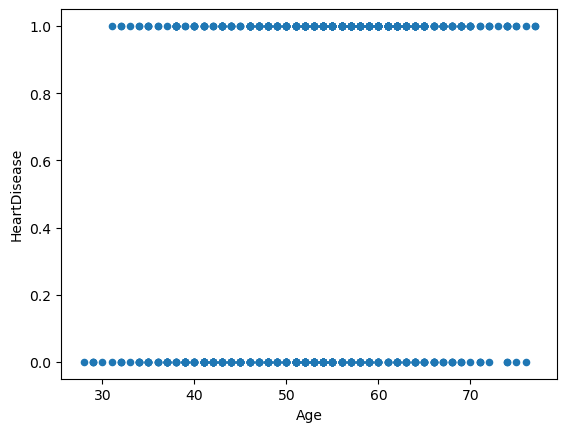

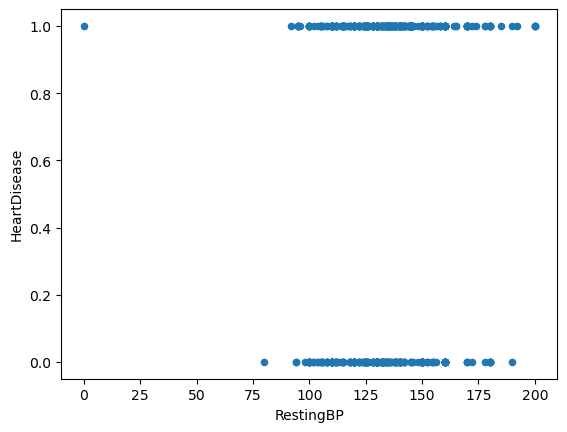

In [38]:
# Gráfico para Age
train[['Age','HeartDisease']].plot.scatter(x='Age',y='HeartDisease')
# Gráfico para RestingBP
train[['RestingBP','HeartDisease']].plot.scatter(x='RestingBP',y='HeartDisease')

## Función logística

In [39]:
# pruebas de parametro
w = 0.09
b = -3.6

# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]

### Gráfica de la recta para RestingBP

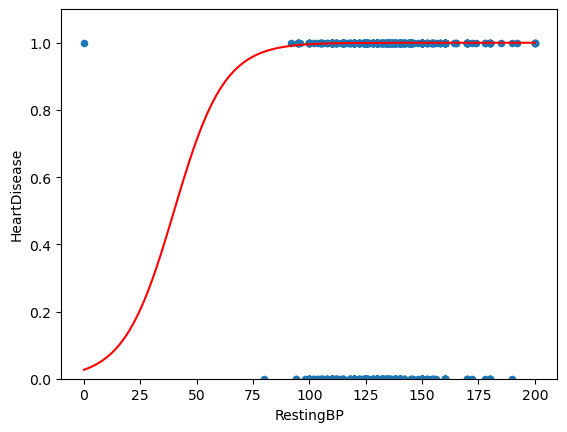

In [18]:
# puntos de la recta
x = np.linspace(0,train['RestingBP'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# gráfica de la recta
train.plot.scatter(x='RestingBP',y='HeartDisease')

plt.plot(x, y, '-r')
plt.ylim(0,train['HeartDisease'].max()*1.1)
# plt.grid()
plt.show()

### Gráfica de la recta para Age

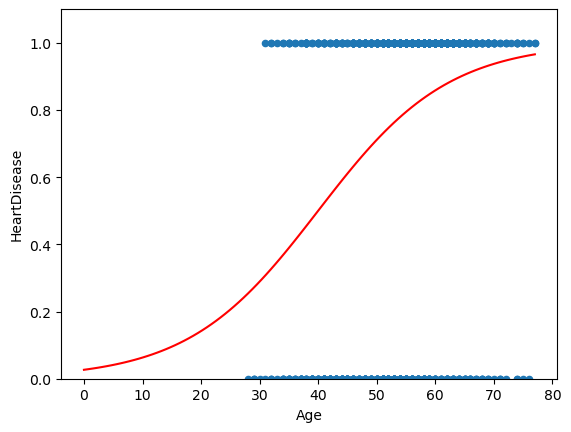

In [24]:
# puntos de la recta
x = np.linspace(0,train['Age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='Age',y='HeartDisease')

plt.plot(x, y, '-r')
plt.ylim(0,train['HeartDisease'].max()*1.1)
# plt.grid()
plt.show()

## Optimización de parámetros para Age

In [43]:
# calculo de las predicciones
train['sigmoid'] = 1/(1+np.exp(-(train['Age']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['HeartDisease']*np.log(train['sigmoid'])-(1-train['HeartDisease'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

0.7478450271767766

hacemos dataframe para calcular el error en funcion de los parametros w, b

In [27]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [28]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [29]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['Age']*df['w']+df['b'])))
    train['loss_xi'] = -train['HeartDisease']*np.log(train['sigmoid'])-(1-train['HeartDisease'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [30]:
df['error'] = df.apply(sum_error_df, axis=1)

In [31]:
df.sort_values(by=['error']).head()

,w,b,error
199,0.06,-3.01,0.646627
249,0.07,-3.51,0.646658
248,0.07,-3.52,0.646661
250,0.07,-3.50,0.646678
247,0.07,-3.53,0.646686


In [32]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [33]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.920765,0.917442,0.914136,0.910847,0.907575,0.904319,0.901081,0.897860,0.894655,0.891469,...,0.697935,0.696421,0.694930,0.693463,0.692018,0.690596,0.689197,0.687822,0.686469,0.685140
0.06,0.765169,0.762888,0.760629,0.758389,0.756171,0.753973,0.751797,0.749641,0.747506,0.745393,...,0.648125,0.647866,0.647631,0.647418,0.647228,0.647062,0.646919,0.646799,0.646701,0.646627
0.07,0.673372,0.672284,0.671218,0.670175,0.669154,0.668156,0.667181,0.666228,0.665297,0.664390,...,0.665523,0.666435,0.667367,0.668320,0.669294,0.670289,0.671304,0.672340,0.673396,0.674473
0.08,0.648718,0.648826,0.648957,0.649109,0.649282,0.649477,0.649694,0.649933,0.650193,0.650475,...,0.740981,0.742874,0.744783,0.746710,0.748654,0.750615,0.752592,0.754587,0.756598,0.758626
0.09,0.686261,0.687442,0.688642,0.689861,0.691100,0.692357,0.693633,0.694928,0.696242,0.697574,...,0.862001,0.864653,0.867319,0.869998,0.872690,0.875395,0.878114,0.880845,0.883589,0.886346


In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

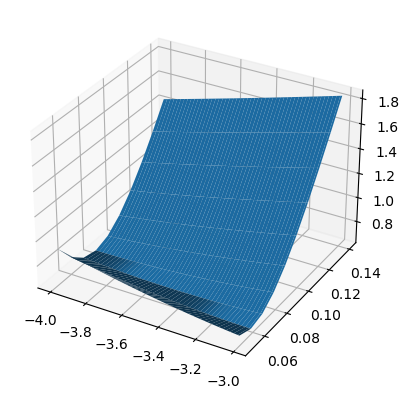

In [35]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

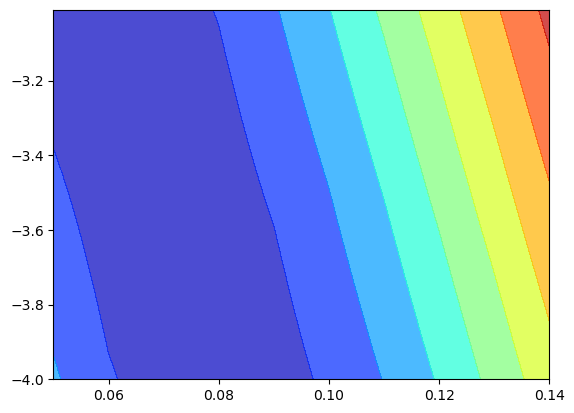

In [36]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

## Optimización de parámetros para RestingBP

In [44]:
# calculo de las predicciones
train['sigmoid'] = 1/(1+np.exp(-(train['RestingBP']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['HeartDisease']*np.log(train['sigmoid'])-(1-train['HeartDisease'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

3.6295373716666877

Hacemos dataframe para calcular el error en funcion de los parametros w, b

In [45]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [46]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [47]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['RestingBP']*df['w']+df['b'])))
    train['loss_xi'] = -train['HeartDisease']*np.log(train['sigmoid'])-(1-train['HeartDisease'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [48]:
df['error'] = df.apply(sum_error_df, axis=1)

In [49]:
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,1.219461
1,0.05,-3.99,1.223043
2,0.05,-3.98,1.226633
3,0.05,-3.97,1.230230
4,0.05,-3.96,1.233835


In [50]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [51]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,1.219461,1.223043,1.226633,1.230230,1.233835,1.237447,1.241066,1.244693,1.248327,1.251968,...,1.566173,1.570242,1.574315,1.578391,1.582470,1.586554,1.590640,1.594730,1.598824,1.602921
0.06,1.736746,1.740909,1.745074,1.749242,1.753413,1.757586,1.761762,1.765941,1.770122,1.774306,...,2.119970,2.124302,2.128635,2.132970,2.137306,2.141643,2.145981,2.150320,2.154661,2.159003
0.07,2.297484,2.301845,2.306206,2.310568,2.314931,2.319295,2.323660,2.328026,2.332393,2.336760,...,2.692776,2.697192,2.701609,2.706026,2.710444,2.714862,2.719281,2.723699,2.728119,2.732538
0.08,2.872333,2.876758,2.881183,2.885608,2.890033,2.894459,2.898885,2.903312,2.907739,2.912166,...,3.271495,3.275938,3.280381,3.284825,3.289268,3.293712,3.298156,3.302600,3.307044,3.311488
0.09,3.451650,3.456095,3.460541,3.464987,3.469432,3.473878,3.478324,3.482770,3.487216,3.491662,...,3.852054,3.856506,3.860957,3.865409,3.869861,3.874313,3.878765,3.883217,3.887669,3.892121


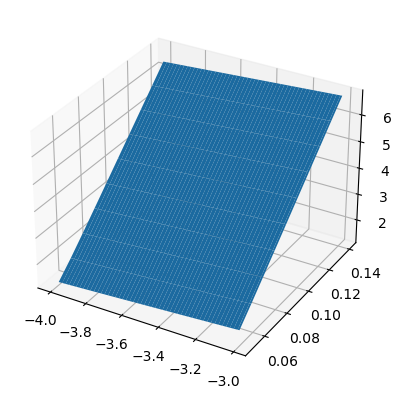

In [52]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

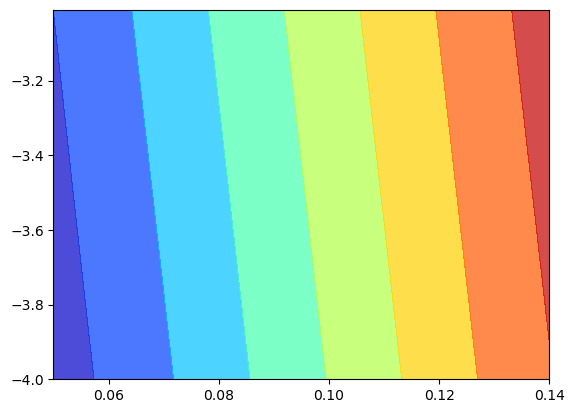

In [53]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)